# Spaceship Titanic

- 세번째 시도
    - Tfdf decision_forest에서 지원하는 모델 모두 써보기

## Import Modules

In [1]:
import os
import sys
from datetime import datetime
from zipfile import ZipFile
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf
import tensorflow_decision_forests as tfdf

2024-01-10 13:33:25.037001: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-10 13:33:25.062187: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:33:25.062215: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:33:25.062789: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:33:25.067752: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.config.list_physical_devices()

2024-01-10 13:33:26.181987: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:33:26.213955: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:33:26.214000: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2024-01-10 13:33:26.237505: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:33:26.237616: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:33:26.237669: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:33:27.249983: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:33:27.250140: I external/local_xla/xla/stream_executor

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14150727187746324346
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9816768512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12433951663232631444
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

## Set envs

In [4]:
PATH_INPUT = './data/in/'
PATH_OUTPUT = './data/out/'
NOW_STR = datetime.now().strftime('%Y%m%d_%H%M%S')
PATH_OUTPUT_NOW = f'./data/out/{NOW_STR}/'

try:
    os.environ["CUDA_VISIBLE_DEVICES"] = "0"
    gpus = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(device=gpus[0], enable=True)
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024)]
    )
except:
    print("NO GPU")

## Get Data

In [5]:
df_train = pd.read_csv('./data/out/preprocessed_data/train_int.csv')
df_test = pd.read_csv('./data/out/preprocessed_data/test_int.csv')

## Train

### Set Input data

In [6]:
exception_cols = ['PassengerId', 'Name']
independents = [ i for i in df_train.keys() if i not in exception_cols ]
# 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'

X = df_train[independents]

X_tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(X, label="Transported")

2024-01-10 13:33:27.336617: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:33:27.336773: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:33:27.336807: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:33:27.336861: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:33:27.336867: I tensorflow/core/common_runtime/gpu/gpu

In [7]:
independents

['CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'Cabin_Deck',
 'Cabin_Num',
 'Cabin_Side',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars']

In [8]:
X.shape

(8693, 16)

### Check available all models

In [9]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

### Definition Function Using,Fitting,Predicting models

In [10]:
def process_model(model, model_name):
    global df_test, X_tf_dataset, X_test_tf_dataset
    global independents

    print(f'{model_name} 학습 시작')
    
    # build
    model.compile(metrics=['accuray'])

    # fit
    model.fit(X_tf_dataset, verbose=1)

    # visualize
    path_out_plot = os.path.join(PATH_OUTPUT_NOW, "monitor")
    if not os.path.exists(path_out_plot):
        os.makedirs(path_out_plot)

    path_out_plot = os.path.join(path_out_plot, f"{model_name}_model_plot.html")

    # vscode - jupyter 경우 사진이 안보임 -> 로컬에 저장. Colab일 경우 보여줌
    if 'vscode' in os.environ['PATH'] and 'google.colab' not in list(sys.modules.keys()):
        with open(path_out_plot, "w") as f:
            f.write(tfdf.model_plotter.plot_model(model, tree_idx=0, max_depth=3))
    else:
        tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

    # validation
    # logs
    logs = model.make_inspector().training_logs()
    if logs is not None:
        plt.plot([ log.num_trees for log in logs ], [ log.evaluation.accuracy for log in logs ])
        plt.xlabel("Number of Trees")
        plt.ylabel("Accuracy (out-of-bag)")
        plt.show()

    inspector = model.make_inspector()
    inspector.evaluation()

    print(f"Available variable importances: {inspector.variable_importances().keys()}")

    print(inspector.variable_importances()["NUM_AS_ROOT"])

    # save model
    if not os.path.exists(os.path.join(PATH_OUTPUT_NOW, "models")):
        os.makedirs(os.path.join(PATH_OUTPUT_NOW, "models"))
    with open(os.path.join(PATH_OUTPUT_NOW, "models", f"model_{model_name}.pkl"), "wb") as f:
        pickle.dump(model, f)

    # predict
    predictions = model.predict(X_test_tf_dataset)
    predictions = map(lambda v: True if v[0] > 0.5 else False, predictions)
    predictions = list(predictions)

    # Export predictions to csv file
    output = pd.DataFrame({ "PassengerId": df_test['PassengerId'].to_list(), "Transported": predictions })
    output_dir = os.path.join(PATH_OUTPUT_NOW, "predict")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    output.to_csv(os.path.join(output_dir, f'predict_tfdf_{model_name}.csv'), index=False)

In [11]:
# change dataframe to tf_dataset
independents = [i for i in independents if i != 'Transported']
X_test = df_test[independents]
X_test_tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(X_test)

In [12]:
df_test.isnull().sum()

PassengerId          0
CryoSleep            0
Destination          0
Age                  0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Cabin_Deck           0
Cabin_Num            0
Cabin_Side           0
HomePlanet_Earth     0
HomePlanet_Europa    0
HomePlanet_Mars      0
dtype: int64

### Use above function

Use /tmp/tmpycgrs0r0 as temporary training directory
RandomForestModel 학습 시작
Reading training dataset...
Training dataset read in 0:00:02.566910. Found 8693 examples.
Training model...


[INFO 24-01-10 13:33:31.5436 KST kernel.cc:1233] Loading model from path /tmp/tmpycgrs0r0/model/ with prefix 5ccf78babdfa4446


Model trained in 0:00:01.051005
Compiling model...


[INFO 24-01-10 13:33:31.8123 KST decision_forest.cc:660] Model loaded with 300 root(s), 314894 node(s), and 15 input feature(s).
[INFO 24-01-10 13:33:31.8123 KST abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-01-10 13:33:31.8123 KST kernel.cc:1061] Use fast generic engine


Model compiled.


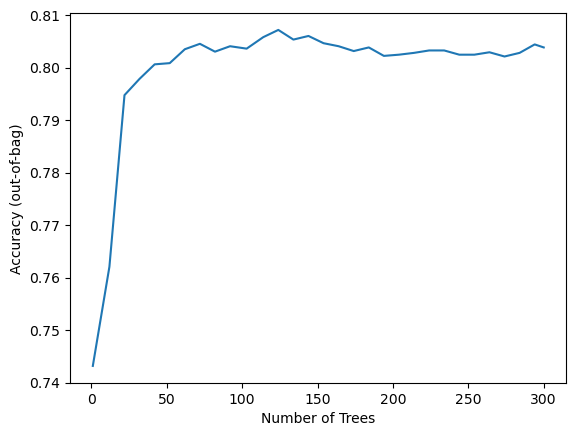

Available variable importances: dict_keys(['NUM_AS_ROOT', 'INV_MEAN_MIN_DEPTH', 'SUM_SCORE', 'NUM_NODES'])
[("CryoSleep" (1; #4), 118.0), ("RoomService" (1; #10), 50.0), ("Spa" (1; #12), 47.0), ("VRDeck" (1; #14), 41.0), ("ShoppingMall" (1; #11), 20.0), ("FoodCourt" (1; #6), 15.0), ("Cabin_Deck" (1; #1), 5.0), ("HomePlanet_Earth" (1; #7), 2.0), ("HomePlanet_Europa" (1; #8), 2.0)]
5/5 [==============================] - 0s 21ms/step
Use /tmp/tmpf3ee4afl as temporary training directory
GradientBoostedTreesModel 학습 시작
Reading training dataset...
Training dataset read in 0:00:00.193490. Found 8693 examples.
Training model...


[WARNING 24-01-10 13:33:32.8471 KST gradient_boosted_trees.cc:1886] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-01-10 13:33:32.8472 KST gradient_boosted_trees.cc:1897] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-01-10 13:33:32.8472 KST gradient_boosted_trees.cc:1911] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Model trained in 0:00:00.907055
Compiling model...
Model compiled.


[INFO 24-01-10 13:33:33.9482 KST kernel.cc:1233] Loading model from path /tmp/tmpf3ee4afl/model/ with prefix 004c345cae6449d6
[INFO 24-01-10 13:33:33.9526 KST quick_scorer_extended.cc:903] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-01-10 13:33:33.9529 KST kernel.cc:1061] Use fast generic engine


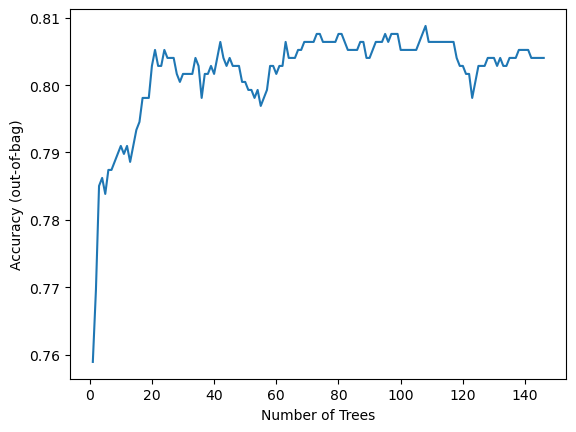

Available variable importances: dict_keys(['INV_MEAN_MIN_DEPTH', 'SUM_SCORE', 'NUM_AS_ROOT', 'NUM_NODES'])
[("Spa" (1; #12), 36.0), ("CryoSleep" (1; #4), 25.0), ("VRDeck" (1; #14), 22.0), ("Cabin_Side" (1; #3), 18.0), ("RoomService" (1; #10), 6.0), ("Age" (1; #0), 5.0), ("Destination" (1; #5), 4.0)]
5/5 [==============================] - 0s 6ms/step
Use /tmp/tmpf7j9tcjr as temporary training directory
CartModel 학습 시작
Reading training dataset...
Training dataset read in 0:00:00.194580. Found 8693 examples.
Training model...
Model trained in 0:00:00.022111
Compiling model...
Model compiled.
Available variable importances: dict_keys(['NUM_NODES', 'NUM_AS_ROOT', 'SUM_SCORE', 'INV_MEAN_MIN_DEPTH'])
[("CryoSleep" (1; #4), 1.0)]


[INFO 24-01-10 13:33:34.4671 KST kernel.cc:1233] Loading model from path /tmp/tmpf7j9tcjr/model/ with prefix d71d2afcc1a640ce
[INFO 24-01-10 13:33:34.4675 KST decision_forest.cc:660] Model loaded with 1 root(s), 155 node(s), and 13 input feature(s).
[INFO 24-01-10 13:33:34.4675 KST kernel.cc:1061] Use fast generic engine


5/5 [==============================] - 0s 4ms/step


In [13]:
all_models = tfdf.keras.get_all_models()

for modelClass in [m for m in all_models if m.__name__ != 'DistributedGradientBoostedTreesModel']:
    model = modelClass(verbose=1)
    process_model(model, modelClass.__name__)